# e(BE:L) RESTful API client

## Summary:

This notebooks demonstrates the potential of the e(BE:L) RESTful API client. This client allows to query a database storing BEL and and eBEL statement. Statistics gives a general overview on the database.

#### Import Note!
For this notebook to function properly, you must have graphviz installed. For more information, visit https://graphviz.gitlab.io/download/

In [1]:
from ebel_rest import connect, query, statistics
%matplotlib inline

## Example Database
To demonstrate how one can use this package to obtain information from a given database, we will use the COVID-19 Knowledge Graph available at http://graphstore.scai.fraunhofer.de/.  

In [2]:
# Database settings
server = "https://graphstore.scai.fraunhofer.de"
password = 'covid'
user = 'covid_user'
db_name = "covid"
print_url = True

# Connect to database
connect(user, password, server, db_name, print_url)

## Statistics

### Display
All statistics can be shown as
1. table (pandas.DataFrame)
3. _data (python object)

In [3]:
s = statistics.publication_by_year()

https://graphstore.scai.fraunhofer.de/function/covid/bel_statistics_publication_by_year/


As a pandas DataFrame:

In [4]:
s.table[:20]

,publication_year,number_of_publications
0,2365,1
1,2020,128
2,2019,46
3,2018,21
4,2017,25
5,2016,23
6,2015,17
7,2014,19
8,2013,17
9,2012,17


As a python dictionary:

In [5]:
s.data

[{'publication_year': 2365, 'number_of_publications': 1},
 {'publication_year': 2020, 'number_of_publications': 128},
 {'publication_year': 2019, 'number_of_publications': 46},
 {'publication_year': 2018, 'number_of_publications': 21},
 {'publication_year': 2017, 'number_of_publications': 25},
 {'publication_year': 2016, 'number_of_publications': 23},
 {'publication_year': 2015, 'number_of_publications': 17},
 {'publication_year': 2014, 'number_of_publications': 19},
 {'publication_year': 2013, 'number_of_publications': 17},
 {'publication_year': 2012, 'number_of_publications': 17},
 {'publication_year': 2011, 'number_of_publications': 29},
 {'publication_year': 2010, 'number_of_publications': 33},
 {'publication_year': 2009, 'number_of_publications': 36},
 {'publication_year': 2008, 'number_of_publications': 42},
 {'publication_year': 2007, 'number_of_publications': 38},
 {'publication_year': 2006, 'number_of_publications': 61},
 {'publication_year': 2005, 'number_of_publications': 41

### Use pandas to visualize ebel_rest tables 

Because tables in `ebel_rest` are pandas tables, all [pandas visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) options are available. Here are 2 examples:

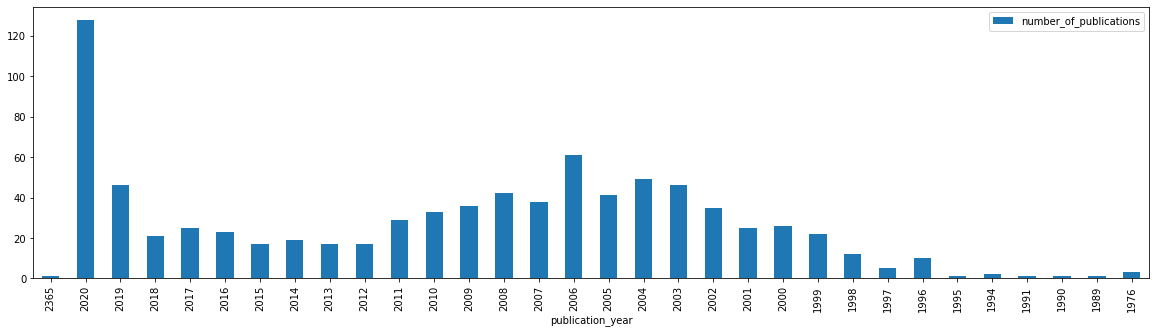

In [6]:
_=s.table.set_index('publication_year').plot.bar(figsize=(20,5))

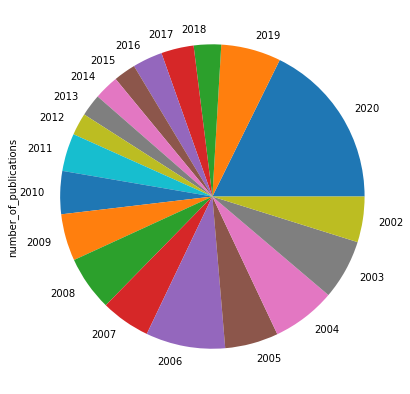

In [7]:
_=s.table[1:20].set_index('publication_year').plot.pie(y='number_of_publications', figsize=(7, 7),legend=None)

## Methods

To keep it simple on the first row for all statistic methods are shown.

### Total Number of Curated Publications

In [8]:
statistics.total_publications().data[0]

https://graphstore.scai.fraunhofer.de/function/covid/bel_statistics_total_publications/


{'number_of_pubs': 834}

### Total Number of Curated BEL Statements

In [9]:
statistics.total_bel_edges().data[0]

https://graphstore.scai.fraunhofer.de/function/covid/bel_statistics_total_stmts/


{'number_of_stmts': 143825}

### Total Number of BEL Nodes from Curated Statements

In [10]:
statistics.total_bel_nodes().data[0]

https://graphstore.scai.fraunhofer.de/function/covid/bel_statistics_total_bel_nodes/


{'number_of_bel_nodes': 39752}

### Publications by year

In [11]:
statistics.publication_by_year().table[:2]

https://graphstore.scai.fraunhofer.de/function/covid/bel_statistics_publication_by_year/


,publication_year,number_of_publications
0,2365,1
1,2020,128


### Publication by number of statements

In [12]:
statistics.publication_by_number_of_statements().table[:1]

https://graphstore.scai.fraunhofer.de/function/covid/bel_statistics_publication_by_number_of_statements/


,pmid,last_author,title,journal,publication_date,number_of_statements
0,32408336,Münch C,Proteomics of SARS-CoV-2-infected host cells r...,Nature,2020-07-21,3348


### Last author by number of publications

In [13]:
statistics.last_author_by_number_of_publications().table[:1]

https://graphstore.scai.fraunhofer.de/function/covid/bel_statistics_last_author_by_number_of_publications/


,last_author,number_of_publications
0,Münch C,3348


### Author by number of statements

In [14]:
statistics.last_author_by_number_of_statements().table[:1]

https://graphstore.scai.fraunhofer.de/function/covid/bel_statistics_last_author_by_number_of_statements/


,last_author,number_of_bel_statements
0,Münch C,3348


### Node namespace ordered by count

In [15]:
statistics.node_namespace_order_by_count().table[:1]

https://graphstore.scai.fraunhofer.de/function/covid/bel_statistics_node_namespace_order_by_count/


,node_class,namespace,count
0,protein,HGNC,8503


### Node namespace ordered by namespace

In [16]:
statistics.node_namespace_order_by_namespace().table[:1]

https://graphstore.scai.fraunhofer.de/function/covid/bel_statistics_node_namespace_order_by_namespace/


,node_class,namespace,count
0,abundance,ADO,1


### Edge classes

In [17]:
statistics.edges().table[:1]

https://graphstore.scai.fraunhofer.de/function/covid/bel_statistics_edges/


,number_of_edges,edge_class
0,55466,positive_correlation


### Node classes

In [18]:
statistics.nodes().table[:1]

https://graphstore.scai.fraunhofer.de/function/covid/bel_statistics_nodes/


,number_of_nodes,node_class
0,11321,gene


## Graphs

All graph data can be retrieved as
1. edges (python object => list of dictionaries)
2. table (pandas.DataFrame)
2. table_all_columns (pandas.DataFrame)

See below the graph view possibilities.

### Graph queries

In [19]:
query.annotation('MeSHAnatomy', 'Lysosomes').edges[0]

https://graphstore.scai.fraunhofer.de/function/covid/bel_by_annotation/MeSHAnatomy/Lysosomes


{'subject_bel': 'act(p(PFAM:"Hydrolase"),ma(GO:"hydrolase activity"))',
 'subject_involved_genes': ['Hydrolase'],
 'subject_involved_other': ['hydrolase activity'],
 'subject_class': 'activity',
 'subject_id': '#234:5',
 'relation': 'increases',
 'pmid': 31394830,
 'edge_id': '#560:466',
 'evidence': 'The acidic hydrolases present in the lysosomal lumen lyse proteins that are degraded for recycling, or that are transferred to the late endosomal MHC class II compartment (MIIC) to be loaded onto MHCII molecules and subsequently presented in this context to CD4+ T cells [25,26,27,28].',
 'last_author': 'Muller S',
 'title': 'HSPA8/HSC70 in Immune Disorders: A Molecular Rheostat that Adjusts Chaperone-Mediated Autophagy Substrates.',
 'publication_date': '2020-05-11',
 'annotation': {'MeSHAnatomy': ['Lysosomes'],
  'PublicationStatus': ['Published'],
  'PublicationType': ['Review'],
  'Section': ['Full Text'],
  'mesh': ['Animals',
   'Chaperone-Mediated Autophagy',
   'HSC70 Heat-Shock Pr

#### Ouery by last author

In [20]:
query.last_author('Denison MR').table[:1]

https://graphstore.scai.fraunhofer.de/function/covid/bel_by_last_author/Denison%20MR///


,subject_bel,relation,object_bel,pmid
edge_id,,,,
#554:420,"p(UNIPROT:""P0C6X7"",frag(""1_180""))",increases,"p(HGNC:""CXCL10"")",17397959


#### Query by PubMed identifier

In [21]:
query.pmid(32129518).table[:1]

https://graphstore.scai.fraunhofer.de/function/covid/bel_by_pmid/32129518


,subject_bel,relation,object_bel,pmid
edge_id,,,,
#669:850,"act(p(HGNC:""ACE2""))",negative_correlation,"path(MESH:""Lung Injury"")",32129518


#### Causal & correlative relations by gene symbol

In [22]:
query.causal_correlative_by_gene('ACE2').table[:1]

https://graphstore.scai.fraunhofer.de/function/covid/bel_causal_correlative_by_gene/ACE2


,subject_bel,relation,object_bel,pmid
edge_id,,,,
#589:346,"complex(a(CHEBI:""allyl methyl disulfide""),p(HG...",decreases,"act(p(HGNC:""ACE2""))",0


#### All causal paths from gene 1 to gene 2 with causal relations 

In [23]:
query.path(source='FURIN',target='COVID-19',min_edges=1,max_edges=2).table[:3]

https://graphstore.scai.fraunhofer.de/function/covid/bel_path/FURIN/COVID-19/1-2


,subject_bel,relation,object_bel,pmid
edge_id,,,,
#555:756,"complex(p(HGNC:""ACE2""),p(UNIPROT:""P0DTC2""))",increases,"path(DO:""COVID-19"")",32227090
#569:708,"p(HGNC:""FURIN"")",increases,"complex(p(HGNC:""ACE2""),p(UNIPROT:""P0DTC2""))",0
#566:88,"complex(p(HGNC:""ACE2""),p(UNIPROT:""P0DTC2""))",increases,"path(DO:""COVID-19"")",32186711


#### BELish

In [24]:
query.belish('p(HGNC:"IFNB1") ? ?').table

https://graphstore.scai.fraunhofer.de/function/covid/belish_helper/p%28HGNC%3A%22IFNB1%22%29%20%3F%20%3F


,subject_bel,relation,object_bel,pmid
edge_id,,,,
#556:140,"p(HGNC:""IFNB1"")",increases,"complex(p(HGNC:""IFNAR1""),p(HGNC:""IFNB1""))",0
#557:407,"p(HGNC:""IFNB1"")",increases,"bp(GOBP:""regulation of autophagy"")",0
#558:678,"p(HGNC:""IFNB1"")",increases,"p(HGNC:""TIRAP"")",19029990
#565:11,"p(HGNC:""IFNB1"")",increases,"bp(GOBP:""macrophage activation"")",19029990
#593:284,"p(HGNC:""IFNB1"")",decreases,"path(DO:""COVID-19"")",0
...,...,...,...,...
#697:3177,"p(HGNC:""IFNB1"")",positive_correlation,"p(HGNC:""MPL"")",0
#697:3242,"p(HGNC:""IFNB1"")",positive_correlation,"bp(GOBP:""macrophage activation"")",0
#697:3335,"p(HGNC:""IFNB1"")",positive_correlation,"p(HGNC:""TP53"")",0


### Graph display

In [25]:
g = query.pmid(32129518)

https://graphstore.scai.fraunhofer.de/function/covid/bel_by_pmid/32129518


#### Table

In [26]:
g.table[:5]

,subject_bel,relation,object_bel,pmid
edge_id,,,,
#669:850,"act(p(HGNC:""ACE2""))",negative_correlation,"path(MESH:""Lung Injury"")",32129518
#593:21,"a(CHEBI:""telmisartan"")",decreases,"path(DO:""kidney disease"")",32129518
#600:219,"a(CHEBI:""olmesartan"")",decreases,"act(p(HGNC:""AGTR1""))",32129518
#565:516,"a(CHEBI:""angiotensin II"")",increases,"act(p(HGNC:""AGTR1""))",32129518
#690:2161,"path(DO:""COVID-19"")",positive_correlation,"a(CHEBI:""angiotensin II"")",32129518


#### Table (comprehensive)

In [27]:
g.table_all_columns[:4]

,subject_bel,relation,object_bel,annotation,last_author,publication_date,title,evidence,pmid
edge_id,,,,,,,,,
#669:850,"act(p(HGNC:""ACE2""))",negative_correlation,"path(MESH:""Lung Injury"")","{'Custom_Disease': ['COVID-19'], 'MeSHAnatomy'...",Gurwitz D,2020-05-19,Angiotensin receptor blockers as tentative SAR...,"Therefore, higher ACE2 expression following ch...",32129518
#593:21,"a(CHEBI:""telmisartan"")",decreases,"path(DO:""kidney disease"")","{'Custom_Disease': ['COVID-19'], 'PublicationS...",Gurwitz D,2020-05-19,Angiotensin receptor blockers as tentative SAR...,"Losartan, telmisartan, olmesartan (and additio...",32129518
#600:219,"a(CHEBI:""olmesartan"")",decreases,"act(p(HGNC:""AGTR1""))","{'MeSHDisease': ['Hypertension'], 'Publication...",Gurwitz D,2020-05-19,Angiotensin receptor blockers as tentative SAR...,"The AT1R antagonists losartan and olmesartan, ...",32129518
#565:516,"a(CHEBI:""angiotensin II"")",increases,"act(p(HGNC:""AGTR1""))","{'Custom_Disease': ['COVID-19'], 'MeSHAnatomy'...",Gurwitz D,2020-05-19,Angiotensin receptor blockers as tentative SAR...,"This in turn contributes to lung injury, as an...",32129518


#### BEL graph (simplified)

In [28]:
g.as_graph()

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tpng', '-O', 'bel_by_pmid'], make sure the Graphviz executables are on your systems' PATH

#### BEL graph (simplified with edge IDs)

In [ ]:
g.as_graph_with_ids()

#### BEL graph (with node labels as BEL)

In [ ]:
g.as_graph_bel()

#### BEL graph (with node labels as BEL and edge IDs)

In [ ]:
g.as_graph_bel_with_ids()